# ARIMA

Bayangkan Anda adalah pemilik toko yang menjual barang-barang elektronik. Anda ingin mengetahui berapa banyak produk tertentu yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Penjualan produk Anda tidak memiliki pola musiman yang jelas, tetapi menunjukkan tren pertumbuhan yang stabil dari bulan ke bulan. Di sinilah metode ARIMA dapat membantu!

ARIMA adalah singkatan dari AutoRegressive Integrated Moving Average. Ini adalah metode statistik yang digunakan untuk memprediksi nilai di masa depan berdasarkan data historis yang sudah ada. ARIMA sangat berguna untuk menganalisis data deret waktu yang memiliki sifat stasioner atau yang dapat dijadikan stasioner melalui teknik differencing.

### Fungsi ARIMA
Pikirkan ARIMA sebagai alat yang membantu Anda memperkirakan berapa banyak barang yang harus Anda pesan berdasarkan data penjualan di masa lalu. Berikut adalah langkah-langkah bagaimana ARIMA bekerja:
1. Mempelajari Data Sebelumnya: ARIMA menganalisis data penjualan dari bulan-bulan sebelumnya untuk menemukan pola dan hubungan. Misalnya, meskipun penjualan tidak menunjukkan fluktuasi musiman yang jelas, Anda mungkin melihat bahwa penjualan terus meningkat seiring waktu.
2. Menghilangkan Tren: Untuk menggunakan ARIMA, pertama-tama kita perlu memastikan data bersifat stasioner. Jika data penjualan Anda menunjukkan tren yang jelas (misalnya, penjualan yang meningkat setiap bulan), ARIMA akan membantu menghilangkan tren ini dengan menggunakan teknik differencing untuk membuat data lebih stabil.
3. Membuat Prediksi: Setelah mempelajari data dan memastikan data stasioner, ARIMA akan menghasilkan prediksi untuk bulan-bulan mendatang. Misalnya, berdasarkan data penjualan sebelumnya, ARIMA mungkin memperkirakan bahwa pada bulan Januari, Anda akan menjual 300 unit produk tertentu.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, Anda bisa membandingkan hasil prediksi dengan data penjualan aktual untuk menilai seberapa akurat prediksi tersebut. Jika hasilnya mendekati data aktual, itu menunjukkan bahwa ARIMA bekerja dengan baik dalam memprediksi penjualan.

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Penggunaan Data

In [2]:

df = pd.read_csv("penjualanARIMA.csv", sep=';')
# display(df)

# Mengubah format data
# Fungsi id_vars untuk membaca baris
# Fungsi var_name untuk membaca kolom
# Fungsi value_name untuk membaca hasil
pisahdata = df.melt(id_vars=[df.columns[0]], var_name='Tahun', value_name='Sales')

# Mengubah kolom data sebelumnya yang sudah kita buat menjadi satu data tanggal yang utuh
pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata[df.columns[0]])
# print(pisahdata)

# Mengatur Tanggal sebagai indeks dan memilih kolom yang relevan
sales_data = pisahdata.set_index('Tanggal')[['Sales']]


In [3]:
display(sales_data)

,Sales
Tanggal,
2020-01-01,68
2020-02-01,79
2020-03-01,89
2020-04-01,80
2020-05-01,80
2020-06-01,89
2020-07-01,99
2020-08-01,100
2020-09-01,97


# 2. Visualisasikan Data Bulanan Tersebut

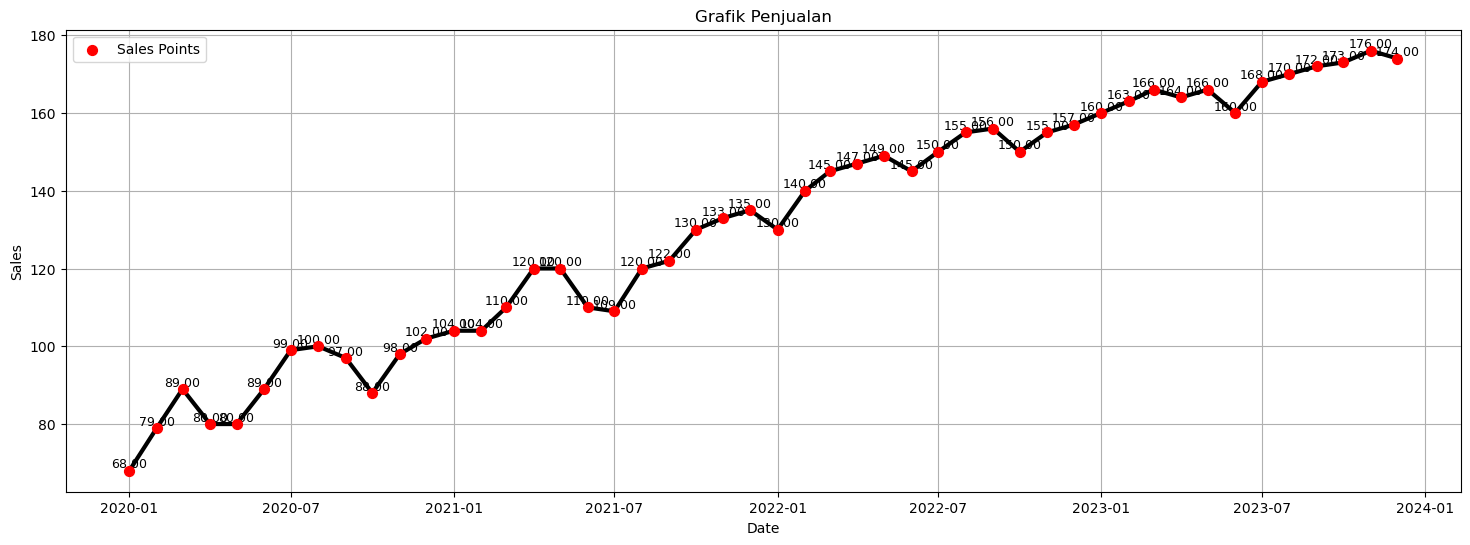

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6)) 

# Menggambar garis penjualan
plt.plot(sales_data['Sales'], linewidth=3, c='black') 

# Menambahkan titik pada setiap data penjualan
plt.scatter(sales_data.index, sales_data['Sales'], color='red', s=50, label='Sales Points', zorder=5) 

# Menambahkan tulisan nominal pada setiap titik
for i, value in enumerate(sales_data['Sales']):
    plt.text(sales_data.index[i], value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')
    
plt.title("Grafik Penjualan") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()  # Menampilkan legend
plt.grid()  # Menambahkan grid untuk lebih jelas
plt.show()


# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(sales_data['Sales'])

ADF Statistic: -1.699587274656437
p-value: 0.43132513792036786
Statisioner: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah Non-stasioner


# 4. Tentukan Parameter ARIMA

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

In [34]:
p, d, q = 1, 2, 1

# 5. Latih Model ARIMA

In [35]:
model = ARIMA(sales_data, order=(p, d, q)) 
results = model.fit()
model

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# 6. Prediksi Periode Mendatang dengan ARIMA

In [36]:
Periode = 24 
Prediksi = results.get_forecast(steps=Periode) 
Rata_Prediksi = Prediksi.predicted_mean 
Confiden_Interval_Prediksi = Prediksi.conf_int()

print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2024-01-01    176.299645
2024-02-01    178.553513
2024-03-01    180.807869
2024-04-01    183.062219
2024-05-01    185.316569
2024-06-01    187.570919
2024-07-01    189.825270
2024-08-01    192.079620
2024-09-01    194.333970
2024-10-01    196.588321
2024-11-01    198.842671
2024-12-01    201.097021
2025-01-01    203.351372
2025-02-01    205.605722
2025-03-01    207.860072
2025-04-01    210.114422
2025-05-01    212.368773
2025-06-01    214.623123
2025-07-01    216.877473
2025-08-01    219.131824
2025-09-01    221.386174
2025-10-01    223.640524
2025-11-01    225.894875
2025-12-01    228.149225
Freq: MS, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2024-01-01,165.608776,186.990515
2024-02-01,163.358703,193.748324
2024-03-01,162.041941,199.573796
2024-04-01,161.196674,204.927764
2024-05-01,160.644549,209.988590
2024-06-01,160.294928,214.846911
2024-07-01,160.094556,219.555983
2024-08-01,160.009143,224.150097
2024-09-01,160.015168,228.652773
2024-10-01,160.095727,233.080915


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

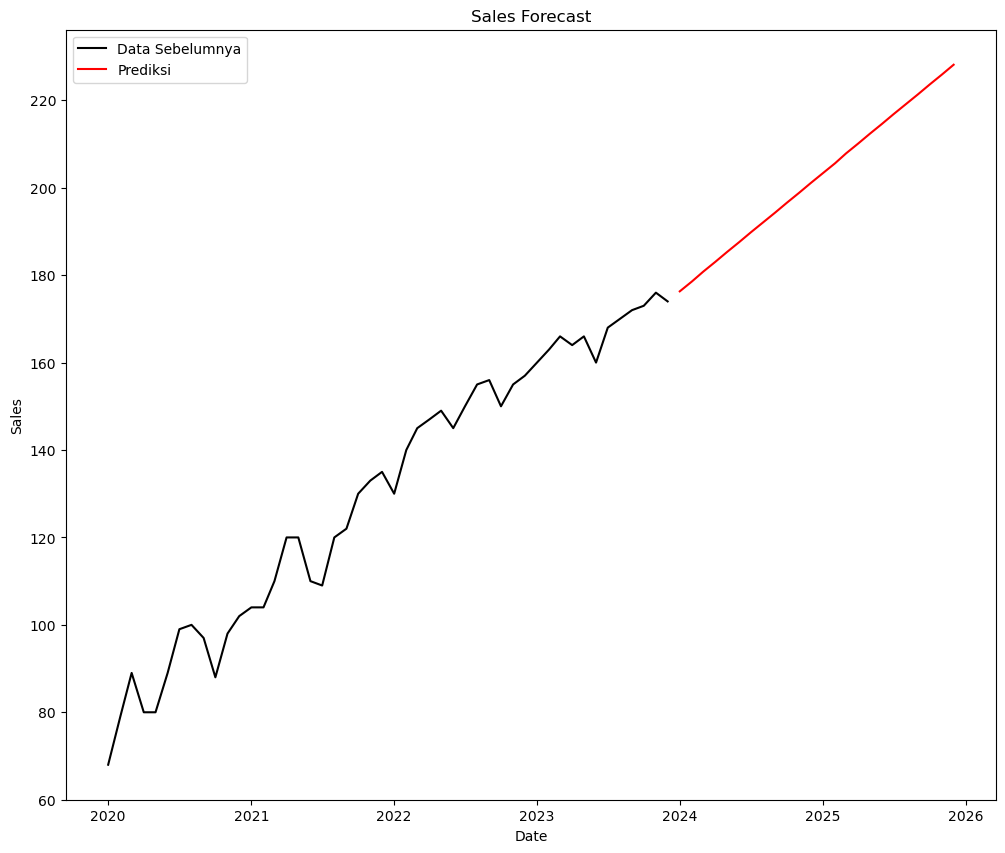

In [37]:
plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

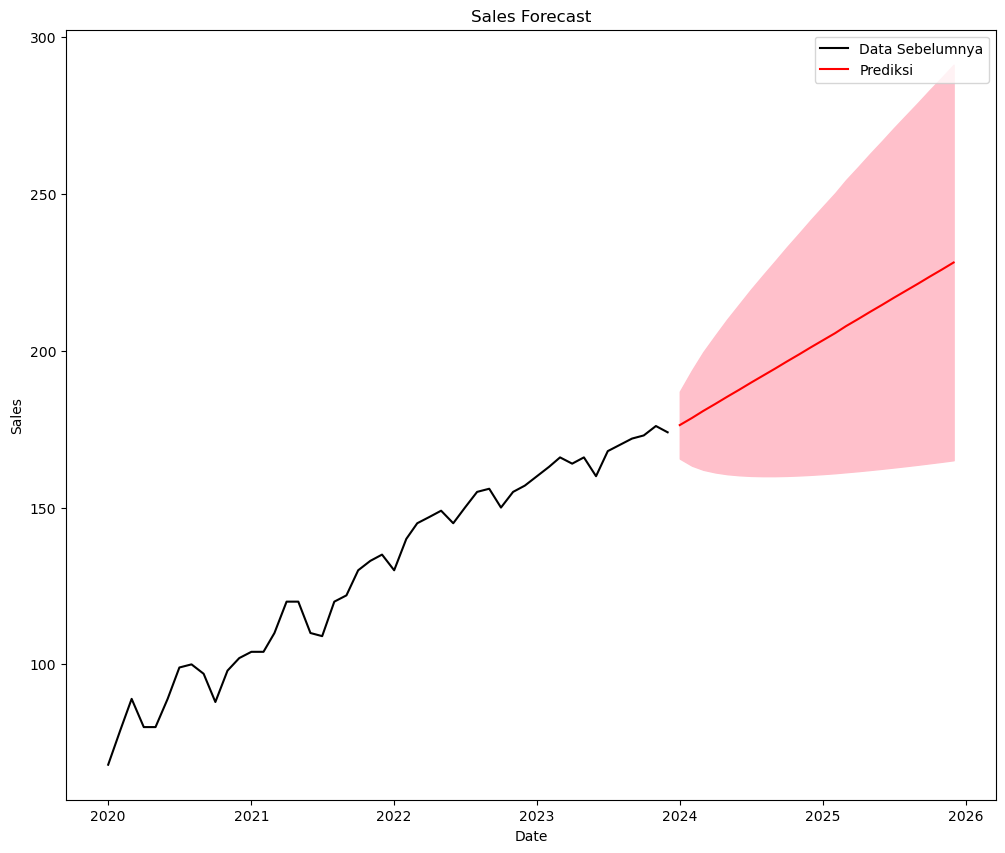

In [38]:
plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# 7. Lakukan Uji MAE dan MSE

Kita bandingkan data prediksi kita dengan data aktual yang yang kita berikan nama "Data_sebelumnya". Uji tersebut dilakukan dengan uji MAE dan MSE:
### MAE menghitung rata-rata absolut dari error, mengukur deviasi prediksi dari nilai aktual tanpa memperhatikan arah deviasi. Uji MAE seperti:
- Menebak tinggi teman, dan setelah itu kamu melihat seberapa jauh tebakan dari tinggi sebenarnya. Semua selisih ini dihitung, lalu kita ambil rata-ratanya.

### MSE menghitung rata-rata dari error yang dikuadratkan, memperbesar error besar dan mengurangi pengaruh error kecil. Uji MSE seperti:
- Sama seperti MAE tetapi pada MSE menggunakan teknik pengkuadratan seperti (100-10)^2. Sehingga MSE memprediksi kesalahan yang lebih serius, terutama jika ada satu prediksi yang sangat salah. 



In [39]:
Data_sebelumnya = sales_data[-Periode:] 
print(Data_sebelumnya)
mae = mean_absolute_error(Data_sebelumnya, Rata_Prediksi) 
mse = mean_squared_error(Data_sebelumnya, Rata_Prediksi) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

            Sales
Tanggal          
2022-01-01    130
2022-02-01    140
2022-03-01    145
2022-04-01    147
2022-05-01    149
2022-06-01    145
2022-07-01    150
2022-08-01    155
2022-09-01    156
2022-10-01    150
2022-11-01    155
2022-12-01    157
2023-01-01    160
2023-02-01    163
2023-03-01    166
2023-04-01    164
2023-05-01    166
2023-06-01    160
2023-07-01    168
2023-08-01    170
2023-09-01    172
2023-10-01    173
2023-11-01    176
2023-12-01    174
MAE: 44.265882767418816
MSE: 1989.4465409858967


# 8. Lihat Uji dengan Kondisi Asli

Pada kasus ini, gunakan data 12 tahun terakhir untuk memperdiksi kemudian kita lihat seberapa akurat prediksi tersebut dengan hasil asli.
1. train_data untuk menyimpan data yang akan kita latih
2. test_data untuk menyimpan data asli tersebut



Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,lower Sales,upper Sales
2023-01-01,147.734163,171.326920
2023-02-01,144.838657,179.324637
2023-03-01,143.086588,186.180510
2023-04-01,141.895340,192.475624
2023-05-01,141.044845,198.429989
2023-06-01,140.425762,204.152940
2023-07-01,139.974893,209.707679
2023-08-01,139.652061,215.134380
2023-09-01,139.429999,220.460310
2023-10-01,139.289292,225.704886


2023-01-01    159.530542
2023-02-01    162.081647
2023-03-01    164.633549
2023-04-01    167.185482
2023-05-01    169.737417
2023-06-01    172.289351
2023-07-01    174.841286
2023-08-01    177.393220
2023-09-01    179.945155
2023-10-01    182.497089
2023-11-01    185.049023
2023-12-01    187.600958
Freq: MS, Name: predicted_mean, dtype: float64

MAE: 6.357770245163802
MSE: 58.31071964716861


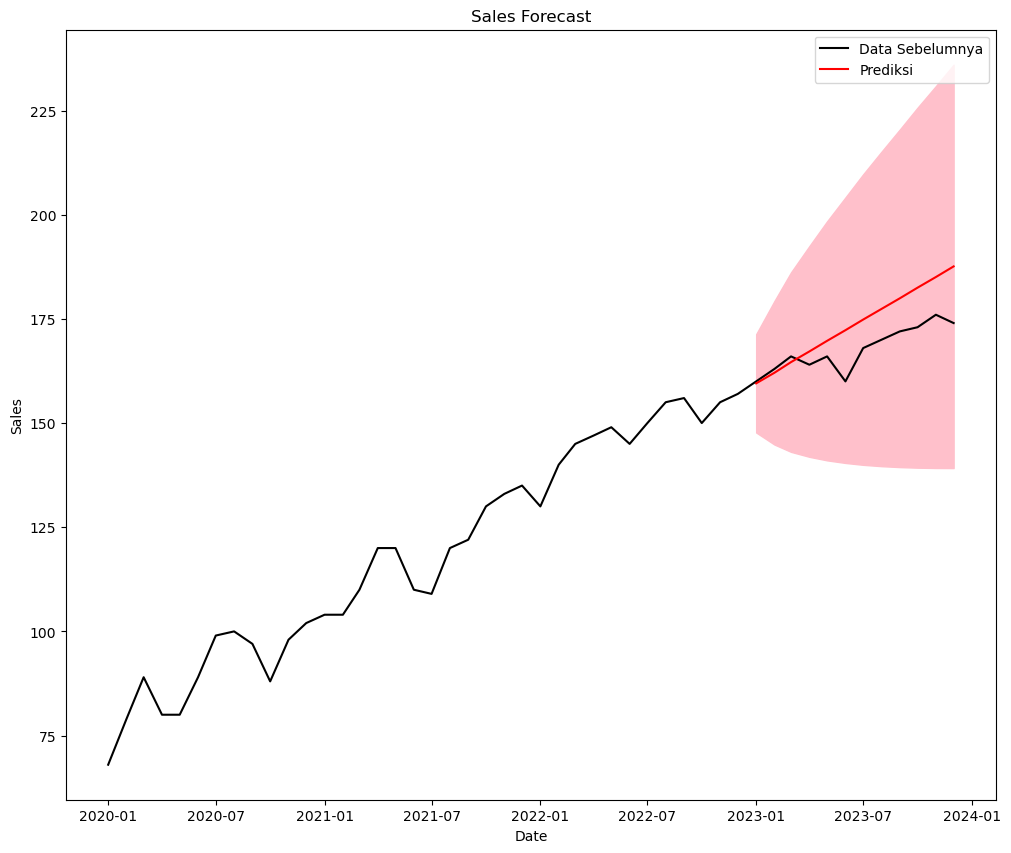

In [44]:
train_data = sales_data[:-12]
test_data = sales_data[-12:]

model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()